栈与队列
# 栈
栈（stack）是一种遵循先入后出逻辑的线性数据结构。

我们可以将栈类比为桌面上的一摞盘子，规定每次只能移动一个盘子，那么想取出底部的盘子，则需要先将上面的盘子依次移走。我们将盘子替换为各种类型的元素（如整数、字符、对象等），就得到了栈这种数据结构。

如图 5-1 所示，我们把堆叠元素的顶部称为“栈顶”，底部称为“栈底”。将把元素添加到栈顶的操作叫作“入栈”，删除栈顶元素的操作叫作“出栈”。
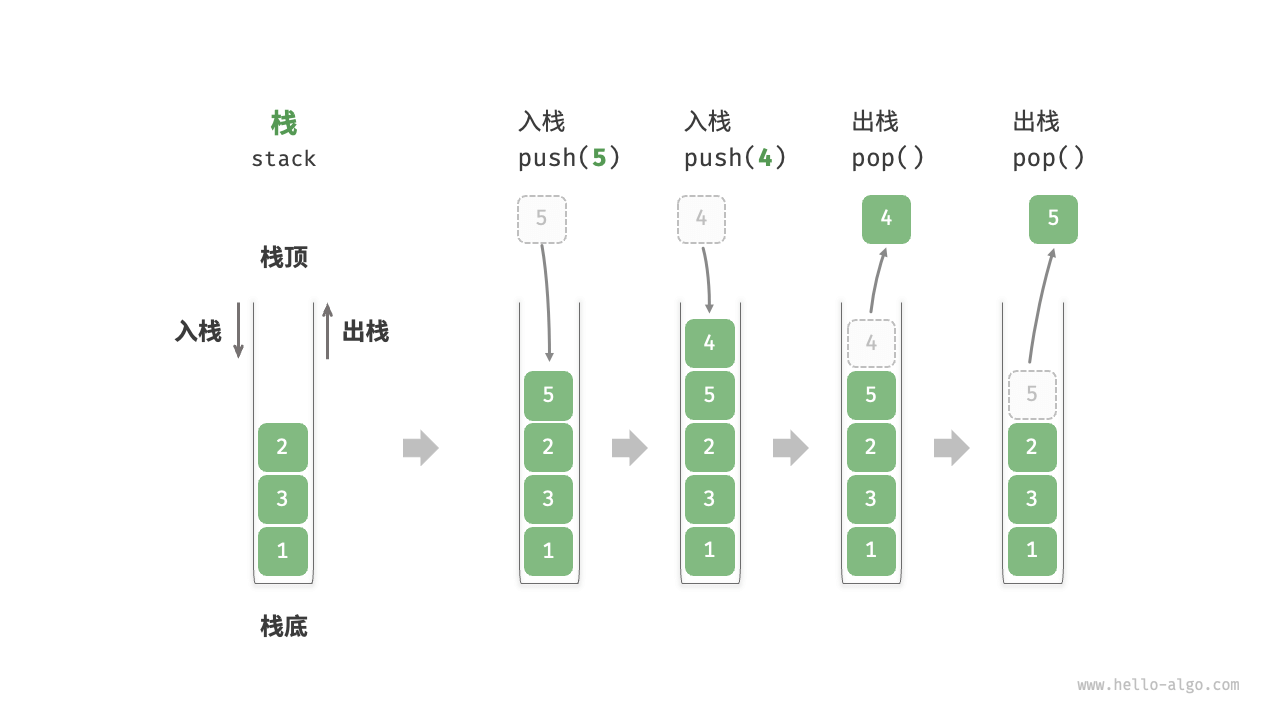
## 栈的常用操作

栈的常用操作如下表所示，具体的方法名需要根据所使用的编程语言来确定。在此，我们以常见的 `push()`、`pop()`、`peek()` 命名为例。

<p align="center"> 表 <id> &nbsp; 栈的操作效率 </p>

| 方法     | 描述                   | 时间复杂度 |
| -------- | ---------------------- | ---------- |
| `push()` | 元素入栈（添加至栈顶） | $O(1)$     |
| `pop()`  | 栈顶元素出栈           | $O(1)$     |
| `peek()` | 访问栈顶元素           | $O(1)$     |

通常情况下，我们可以直接使用编程语言内置的栈类。然而，某些语言可能没有专门提供栈类，这时我们可以将该语言的“数组”或“链表”当作栈来使用，并在程序逻辑上忽略与栈无关的操作。



In [ ]:
// 在go语言中推荐使用slice来当作栈使用
var stack []int

// 元素入栈
stack = append(stack,1)
stack = append(stack,2)
stack = append(stack,3)
stack = append(stack,5)
stack = append(stack,8)

// 元素出栈
pop := stack[len(stack)-1]
stack = stack[:len(stack)-1]

// 查看栈顶元素
top := stack[len(stack)-1]

// 获取栈的大小
size := len(stack)

// 判断是否为空
isEmpty := len(stack) == 0


## 栈的实现 
为了深入了解栈的运行机制，我们来尝试自己实现一个栈类。

栈遵循先入后出的原则，因此我们只能在栈顶添加或删除元素。然而，数组和链表都可以在任意位置添加和删除元素，**因此栈可以视为一种受限制的数组或链表**。换句话说，我们可以“屏蔽”数组或链表的部分无关操作，使其对外表现的逻辑符合栈的特性。

### 基于链表的实现
使用链表实现栈时，我们可以将链表的头节点视为栈顶，尾节点视为栈底。

如图 5-2 所示，对于入栈操作，我们只需将元素插入链表头部，这种节点插入方法被称为“头插法”。而对于出栈操作，只需将头节点从链表中删除即可。
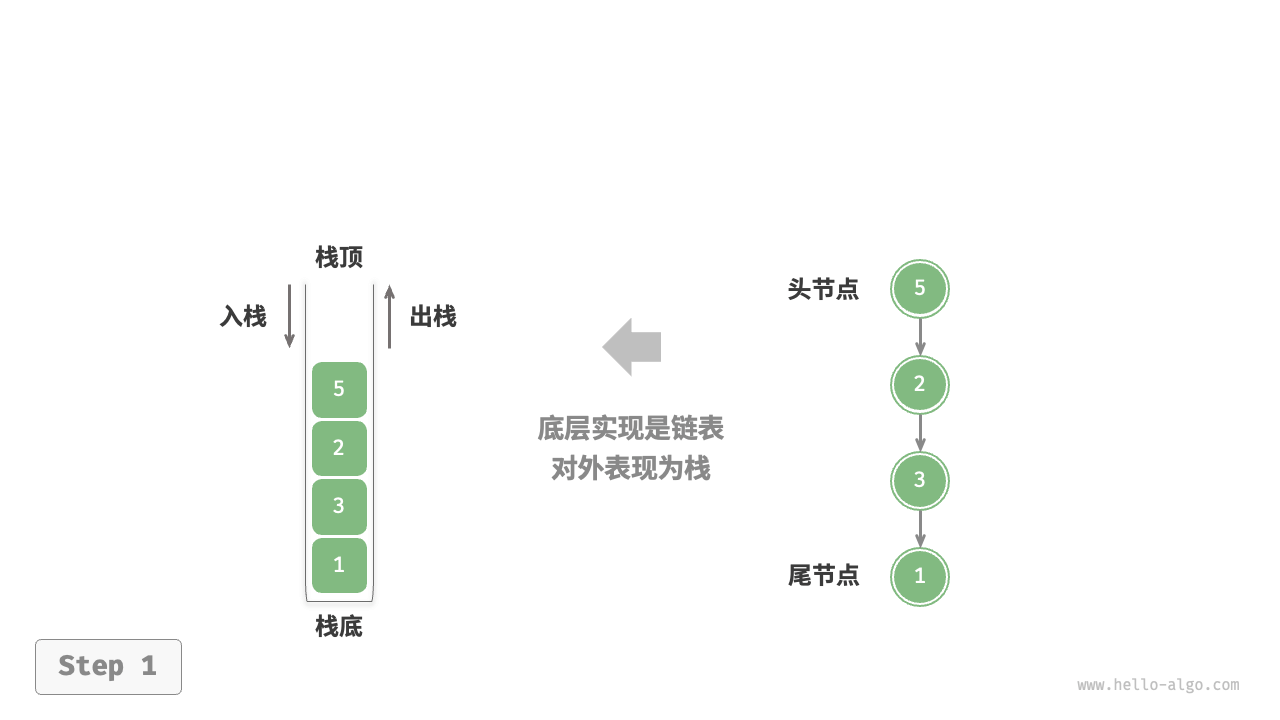


In [ ]:
// 基于链表实现栈
type linkedliststack struct{
	// 用内置包list来实现栈
	data *list.List
}

// 初始化栈
func NewLinkedListStack() *linkedliststack {
	return &linkedliststack{
		data: list.New(),
	}
}

// 入栈
func (s *linkedliststack) Push(val int) {
	s.data.PushBack(val)
}

// 出栈
func (s *linkedliststack) Pop() int {
	if s.data.Len() == 0 {
		panic("stack is empty")
	}
	element := s.data.Back()
	s.data.Remove(element)
	return element.Value.(int)
}

// 查看栈顶元素
func (s *linkedliststack) Top() int {
	if s.data.Len() == 0 {
		panic("stack is empty")
	}
	return s.data.Back().Value.(int)
}

// 获取栈的大小
func (s *linkedliststack) Size() int {
	return s.data.Len()
}

// 判断是否为空
func (s *linkedliststack) IsEmpty() bool {
	return s.data.Len() == 0
}


// 获取list用于打印
func (s *linkedliststack) tolist() *list.List {
	return s.data 
}

### 基于数组实现
使用数组实现栈时，我们可以将数组的尾部作为栈顶。如图 5-3 所示，入栈与出栈操作分别对应在**数组尾部添加元素与删除元素**，时间复杂度都为$O(1)$.
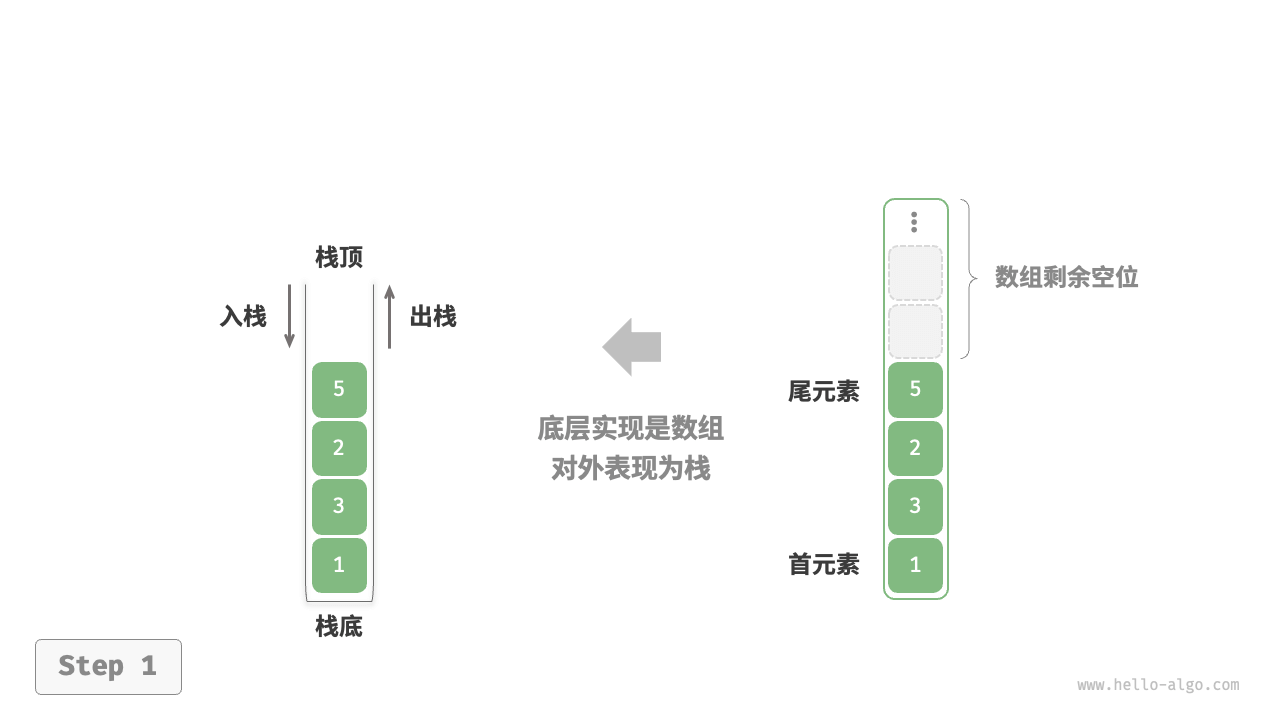
由于入栈的元素可能会源源不断地增加，因此我们可以使用动态数组，这样就无须自行处理数组扩容问题。

In [ ]:
// 基于数组实现的栈
type arraystcak struct{
	data []int
}

// 初始化栈
func Newarraystack() *arraystack{
	return &arraystack{
		data: make([]int,0,16),
	}
}

// 栈的长度
func (s *arraystack) Size() int {
	return len(s.data)
}

// 判断栈是否为空
func (s *arraystack) IsEmpty() bool {
	return len(s.data) == 0
}

// 入栈
func (s *arraystack) Push(val int) {
	s.data = append(s.data,val)
}

// 出栈
func (s *arraystack) Pop() int {
	if len(s.data) == 0 {
		panic("stack is empty")
	}
	val := s.data[len(s.data)-1]
	s.data = s.data[:len(s.data)-1]
	return val
}

// 查看栈顶元素
func (s *arraystack) Top() int {
	if len(s.data) == 0{
		panic("stack is empty")
	}
	val = s.data[len(s.data)-1]
	return val
}

// 获取slice用于打印
func (s *arraystack) toslice() []int{
	return s.data
}

// // 当执行 push 操作时，会调用 append(s.data, v) 向切片中添加元素：
// 当 ** 切片长度 len < 容量 cap** 时，append 会直接在底层数组的空闲
// 位置添加元素，不会扩容。
// 当切片长度 len == 容量 cap时，再执行 append 就会触发自动扩容：Go 
// 会创建一个新的、更大的底层数组，将原数组的元素复制到新数组中，然后将
// 新元素添加到新数组里，并更新切片的 len 和 cap（新容量通常是原容量的 
// 2 倍，具体扩容策略还会根据元素类型和数量微调）。
// 简言之，这段代码利用了 Go 切片自动扩容的特性，让基于切片实现的栈无
// 需手动管理容量，在元素数量超过当前容量时会自动 “扩容” 以容纳新元
// 素。

## 两种实现对比

**支持操作**

两种实现都支持栈定义中的各项操作。数组实现额外支持随机访问，但这已超出了栈的定义范畴，因此一般不会用到。

**时间效率**

在基于数组的实现中，入栈和出栈操作都在预先分配好的连续内存中进行，具有很好的缓存本地性，因此效率较高。然而，如果入栈时超出数组容量，会触发扩容机制，导致该次入栈操作的时间复杂度变为 $O(n)$ 。

在基于链表的实现中，链表的扩容非常灵活，不存在上述数组扩容时效率降低的问题。但是，入栈操作需要初始化节点对象并修改指针，因此效率相对较低。不过，如果入栈元素本身就是节点对象，那么可以省去初始化步骤，从而提高效率。

综上所述，当入栈与出栈操作的元素是基本数据类型时，例如 `int` 或 `double` ，我们可以得出以下结论。

- 基于数组实现的栈在触发扩容时效率会降低，但由于扩容是低频操作，因此平均效率更高。
- 基于链表实现的栈可以提供更加稳定的效率表现。

**空间效率**

在初始化列表时，系统会为列表分配“初始容量”，该容量可能超出实际需求；并且，扩容机制通常是按照特定倍率（例如 2 倍）进行扩容的，扩容后的容量也可能超出实际需求。因此，**基于数组实现的栈可能造成一定的空间浪费**。

然而，由于链表节点需要额外存储指针，**因此链表节点占用的空间相对较大**。

综上，我们不能简单地确定哪种实现更加节省内存，需要针对具体情况进行分析。

## 栈的典型应用

- **浏览器中的后退与前进、软件中的撤销与反撤销**。每当我们打开新的网页，浏览器就会对上一个网页执行入栈，这样我们就可以通过后退操作回到上一个网页。后退操作实际上是在执行出栈。如果要同时支持后退和前进，那么需要两个栈来配合实现。
- **程序内存管理**。每次调用函数时，系统都会在栈顶添加一个栈帧，用于记录函数的上下文信息。在递归函数中，向下递推阶段会不断执行入栈操作，而向上回溯阶段则会不断执行出栈操作。
